#### Notebook Objective:
This notebook is aimed at evaluating if the **description, summary or title text data** is able to classify the `deal_type`. The idea is to determine if simply looking at the text can help us make better predictions than randomly guessing.

---

#### Import Libraries

In [1]:
# Basic Data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing NLP libraries

# Importing wordcloud and its necessary stopwords package
from wordcloud import WordCloud, STOPWORDS 

# Natural Language Processing Tool Kit Imports
# Importing Natural Language ToolKit and its essential packages
import nltk

# For seeing and removing stopwords
from nltk.corpus import stopwords 

# For lemmatizing our words 
from nltk.stem import WordNetLemmatizer

# For stemming our words 
from nltk.stem import PorterStemmer

# for cleaning punctuations
import string 

# Regex libraries
import re

# For tokenizations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#Modelling Libraries

#Train-test split
from sklearn.model_selection import train_test_split

# Standard scaler for importing libraries
from sklearn.preprocessing import StandardScaler

# Importing classification models 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

# Evaluation Metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For building up a pipeline
from sklearn.pipeline import Pipeline

# GridSearch cross-validation library
from sklearn.model_selection import GridSearchCV

# importing joblib to save models 
from joblib import dump, load

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

---

#### Import and Inspect data

In [4]:
master = pd.read_csv('clean_data_w_deal.csv')

In [5]:
master.shape

(31604, 118)

In [6]:
master.head()

,title,summary,description,transit,house_rules,max_guests,bathrooms,bedrooms,beds,price,...,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire_home/apt,room_type_private_room,room_type_shared_room,experiences_offered_business,experiences_offered_family,experiences_offered_none,experiences_offered_romantic,experiences_offered_social
0,Quiet Room in Leafy Village near Central London,"My place is good for couples, solo adventurers...","My place is good for couples, solo adventurers...","Free parking on street, on bus route to centra...",not_available,2,2.0,1.0,1.0,39.0,...,0,0,0,1,0,0,0,1,0,0
1,Spacious room in private house.,Newly-decorated double room in beautiful house...,Newly-decorated double room in beautiful house...,Excellent transport links. Five minutes easy w...,"Sorry, but no smokers please.",2,1.0,1.0,1.0,45.0,...,0,0,0,1,0,0,0,1,0,0
2,Bright room in lovely area plus C/Breakfast,Quiet location in smart area with good restaur...,Quiet location in smart area with good restaur...,not_available,Early Check In Weekends only from 1 o Clock on...,3,1.0,1.0,2.0,60.0,...,0,0,0,1,0,0,0,1,0,0
3,"Bright, airy room by Tower Bridge and river","For solo travellers: Bright, airy room in ver...","For solo travellers: Bright, airy room in ver...",Walking In under 5 minutes you can be at Tower...,We are looking for respectful guests to share ...,1,1.0,1.0,1.0,55.0,...,0,0,0,1,0,0,0,1,0,0
4,Bright apartment at London Bridge,A bright and quiet apartment in Central London...,A bright and quiet apartment in Central London...,not_available,I would like that my guests feel like at their...,2,1.0,1.0,1.0,75.0,...,1,0,1,0,0,0,0,1,0,0


In [7]:
text_df = master[['title', 'summary', 'description', 'deal_type']]

In [8]:
text_df.head()

,title,summary,description,deal_type
0,Quiet Room in Leafy Village near Central London,"My place is good for couples, solo adventurers...","My place is good for couples, solo adventurers...",Fair
1,Spacious room in private house.,Newly-decorated double room in beautiful house...,Newly-decorated double room in beautiful house...,Fair
2,Bright room in lovely area plus C/Breakfast,Quiet location in smart area with good restaur...,Quiet location in smart area with good restaur...,Expensive
3,"Bright, airy room by Tower Bridge and river","For solo travellers: Bright, airy room in ver...","For solo travellers: Bright, airy room in ver...",Fair
4,Bright apartment at London Bridge,A bright and quiet apartment in Central London...,A bright and quiet apartment in Central London...,Good


---
#### Standardize all the text

In [9]:
#making a loop to remove any capitalization or punctuations and the digits that may represent any numeric values

for i in text_df.columns:
    #lower case all text
    text_df[i] = text_df[i].str.lower()
    
    #remove punctuations
    text_df[i] = text_df[i].str.translate(str.maketrans('', '', string.punctuation))
    
    #removing digits
    text_df[i] = text_df[i].str.translate(str.maketrans('', '', string.digits))
    
    

In [10]:
text_df

,title,summary,description,deal_type
0,quiet room in leafy village near central london,my place is good for couples solo adventurers ...,my place is good for couples solo adventurers ...,fair
1,spacious room in private house,newlydecorated double room in beautiful house ...,newlydecorated double room in beautiful house ...,fair
2,bright room in lovely area plus cbreakfast,quiet location in smart area with good restaur...,quiet location in smart area with good restaur...,expensive
3,bright airy room by tower bridge and river,for solo travellers bright airy room in very ...,for solo travellers bright airy room in very ...,fair
4,bright apartment at london bridge,a bright and quiet apartment in central london...,a bright and quiet apartment in central london...,good
...,...,...,...,...
31599,stunning flat londonfitzrovia,bright stunning flat situated right in the tre...,bright stunning flat situated right in the tre...,expensive
31600,piccadilly circus double room,fantastic double room in the heart of londons ...,fantastic double room in the heart of londons ...,expensive
31601,charming studio in paddington p,great location in paddington comfortable tripl...,great location in paddington comfortable tripl...,good
31602,marylebone high street very large double room,very large gorgeous double room in lovely hous...,very large gorgeous double room in lovely hous...,good


In [11]:
#
text_df.reset_index(inplace= True, drop = True)

In [12]:
#Checking for any nulls
text_df.isna().sum()

title          0
summary        0
description    0
deal_type      0
dtype: int64

In [13]:
#checking shape of the dataset
text_df.shape

(31604, 4)

In [14]:
#Checking for target class imbalances
text_df.deal_type.value_counts()

fair         13547
good         10624
expensive     7433
Name: deal_type, dtype: int64

---
##### Combining all Text Columns

In [15]:
#Checking all column names to combine
text_df.columns

Index(['title', 'summary', 'description', 'deal_type'], dtype='object')

In [16]:
#Adding columns ti make a new column
text_df['all_text'] = text_df['title'] + ' ' + text_df['summary'] + ' ' + text_df['description']

In [17]:
#making a new dataframe with only one text column for simplicity
nlp_df = text_df[['all_text', 'deal_type']]

In [103]:
#checking new df
nlp_df.head()

,all_text,deal_type
0,quiet room in leafy village near central londo...,fair
1,spacious room in private house newlydecorated ...,fair
2,bright room in lovely area plus cbreakfast qui...,expensive
3,bright airy room by tower bridge and river for...,fair
4,bright apartment at london bridge a bright and...,good


## Train-Test Split

In [19]:
#Intitate the Train Test Split
X = nlp_df['all_text']
y = nlp_df['deal_type']

# We will stratify in order to ensure our data is evenly split for all deal_types 
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 88)

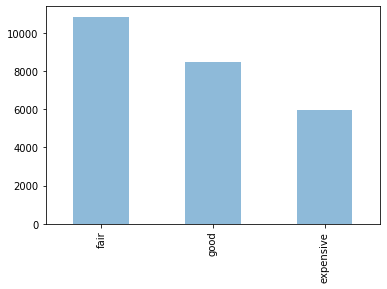

In [20]:
#Checking to ensure the data are balanced (visuals)
y_rem.value_counts().plot(kind='bar', alpha = 0.5)

In [21]:
y_rem.value_counts()

fair         10838
good          8499
expensive     5946
Name: deal_type, dtype: int64

In [ ]:
#addressing Imbalance dataset using SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8, sampling_strategy = 'all', k_neighbors=7)
X_rem, y_rem = sm.fit_sample(X_rem, y_rem)

We have a clear case of class imbalances, so we will vectorize and then upsample using `SMOTE` method.

In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\safiu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stemmer = nltk.stem.PorterStemmer()
vec = CountVectorizer(min_df = 10, tokenizer = my_tokenizer)

In [101]:
#addressing Imbalance dataset using SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8, sampling_strategy = 'all', k_neighbors=7)
X_rem, y_rem = sm.fit_sample(X_rem, y_rem)

In [ ]:
X_rem

In [102]:
%%time
vec.fit(X_rem)
X_rem = vec.transform(X_rem)
X_test = vec.transform(X_test)

AttributeError: lower not found

In [ ]:
X_test

#### lets see what words are dominating the predictions

word_counts = np.array(np.sum(X_rem, axis=0)).reshape((-1,))
words = np.array(vec.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(50)

In [24]:
drop_words = ['street', 'area', 'bathroom', 'hous', 'locat', 'london', 'room', 'walk', 'flat', 'minut', 'bedroom', 'one',
              'station', 'bed', 'min', 'kitchen', 'apart', 'live', 'floor', 'guest', 'pleas', 'also', 'away', 'line',
             'home', 'bu', 'two', 'three', 'five', 'stay', 'travel', 'road', 'citi', ]

In [25]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = list(stopwords)
stopwords.extend(drop_words)

def my_tokenizer2(sentence):
    
    for punctuation_mark in string.punctuation:
        # Remove punctuation and set to lower case
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in stopwords) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

##### Reset the split

# We will stratify in order to ensure our data is evenly split for all deal_types 
X_rem2, X_test2, y_rem2, y_test2 = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 88)

vec2 = CountVectorizer(min_df = 5, tokenizer = my_tokenizer2, ngram_range = (1,2))

%%time

vec2.fit(X_rem2)
X_rem2 = vec2.transform(X_rem2)
X_test2 = vec2.transform(X_test2)

X_rem2

X_test2

#addressing Imbalance dataset using SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8, sampling_strategy = 'not majority', k_neighbors=7)
X_rem2, y_rem2 = sm.fit_sample(X_rem2, y_rem2)

# fitting a logistic regression model again
logreg = LogisticRegression(n_jobs = -1, random_state = 8)
logreg.fit(X_rem2, y_rem2)
# Training score
logreg.score(X_rem2,y_rem2)

#test score
logreg.score(X_test2,y_test2)

#### 3rd split to repeat the process with tfidf count vectorizer

In [41]:
# We will stratify in order to ensure our data is evenly split for all deal_types 
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 88)

In [42]:
%%time
vec3 = TfidfVectorizer(min_df = 10, max_df = 0.8, tokenizer = my_tokenizer2, ngram_range = (1,2))
vec3.fit(X_rem)
X_rem = vec3.transform(X_rem)
X_test = vec3.transform(X_test)

Wall time: 8min 29s


In [43]:
X_rem

<22122x28117 sparse matrix of type '<class 'numpy.float64'>'
	with 2127227 stored elements in Compressed Sparse Row format>

In [44]:
X_test

<9482x28117 sparse matrix of type '<class 'numpy.float64'>'
	with 902999 stored elements in Compressed Sparse Row format>

In [45]:
#addressing Imbalance dataset using SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8, sampling_strategy = 'all', k_neighbors=7)
X_rem, y_rem = sm.fit_sample(X_rem, y_rem)

In [46]:
y_rem.value_counts()

fair         9483
good         9483
expensive    9483
Name: deal_type, dtype: int64

In [47]:
%%time
# fitting a logistic regression model again

logreg = LogisticRegression(n_jobs = -1, random_state = 8)
logreg.fit(X_rem, y_rem)
# Training score
print('Training Score: ', logreg.score(X_rem,y_rem))
print('Test Score: ', logreg.score(X_test,y_test))

Training Score:  0.8082885162923126
Test Score:  0.5047458342121915
Wall time: 25.2 s


### lets deploy pipeline models

In [48]:
#instantiate pipeline and grid
model_pipeline = Pipeline([('dim_reducer', TruncatedSVD()), ('model', LogisticRegression())])

logreg_param_grid = [
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500,600],
    'model': [LogisticRegression(random_state = 8, n_jobs = -1)],
    'model__C': [ 0.1, 1, 10],
    'model__solver': ['lbfgs','sag','saga', 'liblinear']}
]

In [49]:
# Instantiate the logistic regression grid search
logreg_gs = GridSearchCV(model_pipeline, param_grid=logreg_param_grid, cv=5 , verbose=1, scoring = 'accuracy')

In [50]:
%%time

#Fitting the logistic Reg GS
fitted_logreg_gs = logreg_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 236.5min finished


Wall time: 3h 57min 36s


In [51]:
print("Best Estimator: ", fitted_logreg_gs.best_params_)
print("Best Score: ", fitted_logreg_gs.best_score_)

Best Estimator:  {'dim_reducer': TruncatedSVD(n_components=600), 'dim_reducer__n_components': 600, 'model': LogisticRegression(C=10, n_jobs=-1, random_state=8, solver='sag'), 'model__C': 10, 'model__solver': 'sag'}
Best Score:  0.5381572924161294


In [52]:
y_pred_logreg = fitted_logreg_gs.predict(X_test)

Classification Report 
               precision    recall  f1-score   support

   expensive       0.43      0.56      0.49      2230
        fair       0.51      0.38      0.44      4064
        good       0.51      0.58      0.54      3188

    accuracy                           0.49      9482
   macro avg       0.48      0.50      0.49      9482
weighted avg       0.49      0.49      0.48      9482



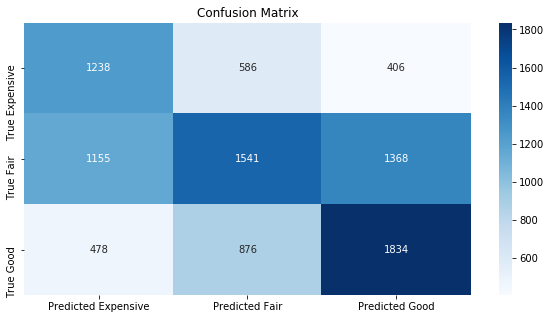

In [97]:
# Setting up our confusion matrix 
logreg_confusion_matrix = confusion_matrix(y_test,y_pred_logreg)

# Making a DataFrame of Confustion matrix for readability
logreg_confusion_matrix = pd.DataFrame(data = logreg_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
logreg_classification_report = classification_report(y_test,y_pred_logreg)
logreg_scores_dict = classification_report(y_test,y_pred_logreg, output_dict = True)

# Print Classification report
print(f'Classification Report \n {logreg_classification_report}')

# Visualizing the confusion matrix heatmap
plt.figure(figsize = (10,5))
sns.heatmap(logreg_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

In [54]:
print('Training Score: ', fitted_logreg_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_logreg_gs.score(X_test,y_test))

Training Score:  0.5735526732046821
Test Score:  0.4865007382408775


In [ ]:
#dump(fitted_logreg_gs, 'nlp_logreg.joblib') 

In [33]:
weat

NameError: name 'weat' is not defined

#### Random Forest

In [58]:
rf_param_grid = [
    
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500],
    'model': [RandomForestClassifier(random_state = 8, n_jobs = -1)],
    'model__max_depth': [5,10,15,20],
    'model__n_estimators': [400,500]}
]

In [59]:
# Instantiate the logistic regression grid search
rf_gs = GridSearchCV(model_pipeline, param_grid=rf_param_grid, cv=5, verbose=5, scoring = 'accuracy')

In [60]:
%%time


#Fitting the logistic Reg GS
fitted_rf_gs = rf_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400, score=0.483, total=  39.6s
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.5s remaining:    0.0s


[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400, score=0.482, total=  37.1s
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400, score=0.480, total=  37.1s
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s


[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400, score=0.493, total=  36.8s
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.5min remaining:    0.0s


[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=400, score=0.528, total=  51.9s
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=500 
[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=500, score=0.486, total=  59.5s
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=500 
[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=5, model__n_estimators=500, score=0.478, total=  46.6s
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClas

[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=15, model__n_estimators=500, score=0.591, total= 1.8min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=15, model__n_estimators=500 
[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=15, model__n_estimators=500, score=0.656, total= 1.8min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=15, model__n_estimators=500 
[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=15, model__n_estimators=500, score=0.713, total= 1.6min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=400, model=RandomFores

[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=10, model__n_estimators=400, score=0.536, total= 1.6min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=10, model__n_estimators=400 
[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=10, model__n_estimators=400, score=0.541, total= 1.3min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=10, model__n_estimators=400 
[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=10, model__n_estimators=400, score=0.544, total= 1.3min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomFores

[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=20, model__n_estimators=400, score=0.681, total= 2.4min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=20, model__n_estimators=400 
[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=20, model__n_estimators=400, score=0.757, total= 1.5min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=20, model__n_estimators=500 
[CV]  dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomForestClassifier(n_jobs=-1, random_state=8), model__max_depth=20, model__n_estimators=500, score=0.608, total= 1.7min
[CV] dim_reducer=TruncatedSVD(), dim_reducer__n_components=500, model=RandomFores

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 116.3min finished


Wall time: 1h 59min 45s


In [61]:
print("Best Estimator: ", fitted_rf_gs.best_estimator_)
print("Best Score: ", fitted_rf_gs.best_score_)

Best Estimator:  Pipeline(steps=[('dim_reducer', TruncatedSVD(n_components=500)),
                ('model',
                 RandomForestClassifier(max_depth=20, n_estimators=500,
                                        n_jobs=-1, random_state=8))])
Best Score:  0.6516257285588908


In [62]:
print('Training Score: ', fitted_rf_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_rf_gs.score(X_test,y_test))

Training Score:  0.9980315652571268
Test Score:  0.5024256485973423


In [63]:
y_pred_rf = fitted_rf_gs.predict(X_test)

Classification Report 
               precision    recall  f1-score   support

   expensive       0.49      0.42      0.45      2230
        fair       0.50      0.53      0.51      4064
        good       0.51      0.53      0.52      3188

    accuracy                           0.50      9482
   macro avg       0.50      0.49      0.50      9482
weighted avg       0.50      0.50      0.50      9482



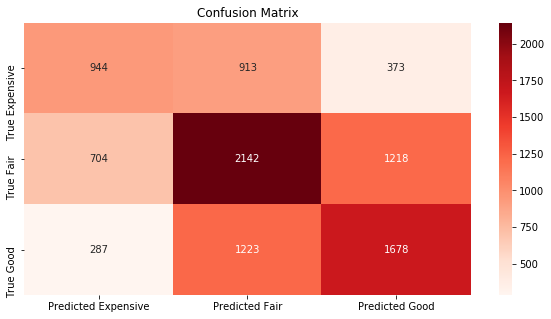

In [93]:
# Setting up our confusion matrix 
rf_confusion_matrix = confusion_matrix(y_test,y_pred_rf)

# Making a DataFrame of Confustion matrix for readability
rf_confusion_matrix = pd.DataFrame(data = rf_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
rf_classification_report = classification_report(y_test,y_pred_rf)
rf_scores_dict = classification_report(y_test,y_pred_rf, output_dict = True)

# Printing classification report
print(f'Classification Report \n {rf_classification_report}')

# Visualizing the confusion matrix heatmap
plt.figure(figsize = (10,5))
sns.heatmap(rf_confusion_matrix, annot = True, cmap='Reds', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

#### KNNs

In [65]:
knn_param_grid = [
    
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500],
    'model': [KNeighborsClassifier(n_jobs = -1)],
    'model__n_neighbors': [3,7,11,15],
    'model__weights': ['uniform', 'distance']}
]

In [66]:
# Instantiate the logistic regression grid search
knn_gs = GridSearchCV(model_pipeline, param_grid = knn_param_grid, cv=5, verbose=1, scoring = 'accuracy')

In [69]:
%%time


#Fitting the logistic Reg GS
fitted_knn_gs = knn_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 151.8min finished


Wall time: 2h 33min 22s


In [70]:
print("Best Estimator: ", fitted_knn_gs.best_estimator_)
print("Best Score: ", fitted_knn_gs.best_score_)

Best Estimator:  Pipeline(steps=[('dim_reducer', TruncatedSVD(n_components=400)),
                ('model',
                 KNeighborsClassifier(n_jobs=-1, n_neighbors=3,
                                      weights='distance'))])
Best Score:  0.6158775128273013


In [71]:
print('Training Score: ', fitted_knn_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_knn_gs.score(X_test,y_test))

Training Score:  0.9979261133959014
Test Score:  0.41626239190044295


In [72]:
y_pred_knn = fitted_knn_gs.predict(X_test)

Classification Report 
               precision    recall  f1-score   support

   expensive       0.43      0.34      0.38      2230
        fair       0.56      0.16      0.25      4064
        good       0.39      0.80      0.52      3188

    accuracy                           0.42      9482
   macro avg       0.46      0.43      0.38      9482
weighted avg       0.47      0.42      0.37      9482



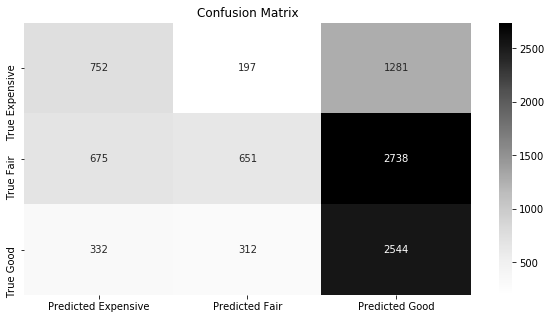

In [94]:
# Setting up our confusion matrix 
knn_confusion_matrix = confusion_matrix(y_test,y_pred_knn)

# Putting the confusion matrix in a DataFrame
knn_confusion_matrix = pd.DataFrame(data = knn_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
knn_classification_report = classification_report(y_test,y_pred_knn)
knn_scores_dict = classification_report(y_test,y_pred_knn, output_dict = True)

# Printing classification report
print(f'Classification Report \n {knn_classification_report}')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(knn_confusion_matrix, annot = True, cmap='Greys', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

### SVM

In [74]:
from sklearn.svm import SVC

In [75]:
svm_param_grid = [
    
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500],
    'model': [SVC(random_state = 8)],
    'model__C': [0.1,1,10],
    'model__kernel': ['rbf', 'sigmoid']}
]

In [76]:
# Instantiate the logistic regression grid search
svm_gs = GridSearchCV(model_pipeline, param_grid=svm_param_grid, cv=4, verbose=1, scoring = 'accuracy')

In [77]:
%%time


#Fitting the logistic Reg GS
fitted_svm_gs = svm_gs.fit(X_rem, y_rem)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 620.2min finished


Wall time: 11h 45min 12s


In [78]:
print("Best Estimator: ", fitted_svm_gs.best_estimator_)
print("Best Score: ", fitted_svm_gs.best_score_)

Best Estimator:  Pipeline(steps=[('dim_reducer', TruncatedSVD(n_components=500)),
                ('model', SVC(C=10, random_state=8))])
Best Score:  0.6942614666708417


In [79]:
print('Training Score: ', fitted_svm_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_svm_gs.score(X_test,y_test))

Training Score:  0.9931456290203522
Test Score:  0.5205652815861632


In [80]:
y_pred_svm = fitted_svm_gs.predict(X_test)

Classification Report 
               precision    recall  f1-score   support

   expensive       0.52      0.44      0.48      2230
        fair       0.51      0.56      0.53      4064
        good       0.53      0.53      0.53      3188

    accuracy                           0.52      9482
   macro avg       0.52      0.51      0.51      9482
weighted avg       0.52      0.52      0.52      9482



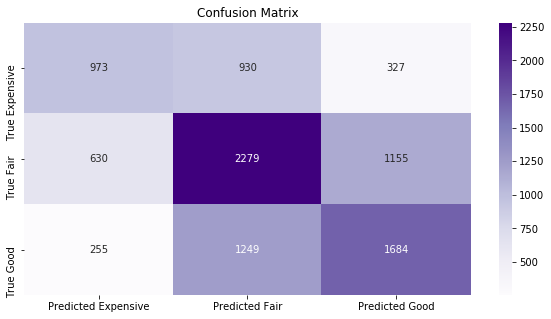

In [96]:
# Setting up our confusion matrix 
svm_confusion_matrix = confusion_matrix(y_test,y_pred_svm)

# Putting the confusion matrix in a DataFrame
svm_confusion_matrix = pd.DataFrame(data = svm_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
svm_classification_report = classification_report(y_test,y_pred_svm)
svm_scores_dict = classification_report(y_test,y_pred_svm, output_dict = True)

# Printing classification report
print(f'Classification Report \n {svm_classification_report}')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(svm_confusion_matrix, annot = True, cmap='Purples', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#dump(fitted_svm_gs, 'nlp_svm.joblib') 

##### AdaBoost

In [83]:
# Intiate a parameter grid for AdaBoost Classifier

ada_param_grid = [
    
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500],
    'model': [AdaBoostClassifier(random_state = 8)],
    'model__n_estimators': [200,400,600],
    'model__learning_rate': [0.5,1]}
]

In [84]:
# Instantiate the logistic regression grid search

ada_gs = GridSearchCV(model_pipeline, param_grid=ada_param_grid, cv=4, verbose=1, scoring = 'accuracy')

In [85]:
%%time


#Fitting the logistic Reg GS
fitted_ada_gs = ada_gs.fit(X_rem, y_rem)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 692.1min finished


Wall time: 12h 5min 27s


In [86]:
#Check for best parameters and best score 

print("Best Parameters: ", fitted_ada_gs.best_params_)
print("Best Score: ", fitted_ada_gs.best_score_)

Best Parameters:  {'dim_reducer': TruncatedSVD(n_components=500), 'dim_reducer__n_components': 500, 'model': AdaBoostClassifier(learning_rate=0.5, n_estimators=600, random_state=8), 'model__learning_rate': 0.5, 'model__n_estimators': 600}
Best Score:  0.5068022325446351


In [87]:
#Use best model to predict test set values

y_pred_ada = fitted_ada_gs.predict(X_test)

In [88]:
#Compare Training and Test set scores to ensure we are not over or under-fitting

print('Training Score: ', fitted_ada_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_ada_gs.score(X_test,y_test))

Training Score:  0.5826215332700622
Test Score:  0.47068129086690574


Classification Report 
               precision    recall  f1-score   support

   expensive       0.42      0.49      0.45      2230
        fair       0.49      0.41      0.45      4064
        good       0.49      0.53      0.51      3188

    accuracy                           0.47      9482
   macro avg       0.47      0.48      0.47      9482
weighted avg       0.47      0.47      0.47      9482



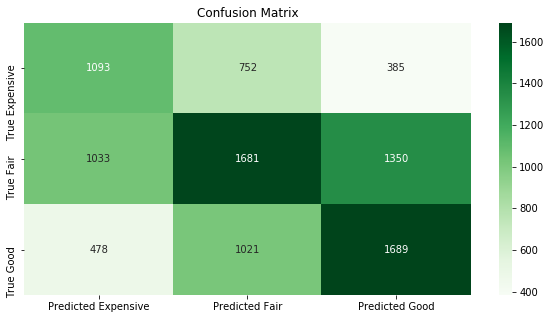

In [90]:
# Setting up our confusion matrix 
ada_confusion_matrix = confusion_matrix(y_test,y_pred_ada)

# Putting the confusion matrix in a DataFrame
ada_confusion_matrix = pd.DataFrame(data = ada_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
ada_classification_report = classification_report(y_test,y_pred_ada)
ada_scores_dict = classification_report(y_test,y_pred_ada, output_dict = True)

# Printing classification report
print(f'Classification Report \n {ada_classification_report}')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(ada_confusion_matrix, annot = True, cmap='Greens', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

In [98]:
#intialize a dataframe to store all results
model_names = ['Logistic Regression', 'Random Forest', 'KNNs', 'SVC', 'AdaBoost']
results = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1_score'], index = model_names)

In [99]:
#Write a loop to summarize all results by using confusion matrix dictionaries
reports = [logreg_scores_dict, rf_scores_dict, knn_scores_dict, svm_scores_dict, ada_scores_dict]

for row in range(0,results.shape[0]):
    results.Accuracy[row] = round(reports[row]['accuracy'],3)
    results.Recall[row] = round(reports[row]['macro avg']['recall'],3)
    results.Precision[row] = round(reports[row]['macro avg']['precision'],3)
    results.F1_score[row] = round(reports[row]['macro avg']['f1-score'],3)

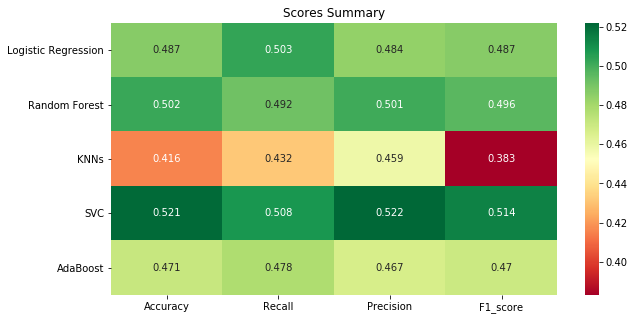

In [100]:
#display the results
results = results.astype('float')
plt.figure(figsize = (10,5))
sns.heatmap(results, annot = True, cmap='RdYlGn', fmt = 'g')
plt.title('Scores Summary')
plt.show()

#### Modelling End!

In [ ]:
X1 = vec3.transform(X)

In [ ]:
prob_pred = pd.DataFrame(fitted_logreg_gs.predict_proba(X1))

In [ ]:
prob_pred.columns = ['nlp_pred_1', 'nlp_pred_2', 'nlp_pred_3']

In [ ]:
prob_pred

In [ ]:
prob_pred.to_csv('nlp_predictions.csv', index = False)

In [ ]:
pred = pd.DataFrame(fitted_logreg_gs.predict(X1), columns = ['nlp_prediction'])

In [ ]:
pred

In [ ]:
pred.to_csv('nlp_output_abs.csv', index = False)